In [18]:
import pandas as pd, json, gcsfs

In [19]:
BUCKET = "arxiv-data-skillful-flow-470023-c0"  
PATH = f"gs://{BUCKET}/raw/arxiv.jsonl"

In [20]:
fs = gcsfs.GCSFileSystem()

In [21]:
records = []
with fs.open(PATH, "r") as f:
    for i, line in enumerate(f):
        if i >= 10000:  # sample first 10k
            break
        records.append(json.loads(line))

In [22]:
df = pd.DataFrame(records)
print(df.shape)
print(df.columns.tolist())

(10000, 14)
['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi', 'report-no', 'categories', 'license', 'abstract', 'versions', 'update_date', 'authors_parsed']


In [23]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


In [24]:
df.info()
df.describe(include="all").transpose().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10000 non-null  object
 1   submitter       10000 non-null  object
 2   authors         10000 non-null  object
 3   title           10000 non-null  object
 4   comments        8862 non-null   object
 5   journal-ref     5433 non-null   object
 6   doi             6362 non-null   object
 7   report-no       883 non-null    object
 8   categories      10000 non-null  object
 9   license         712 non-null    object
 10  abstract        10000 non-null  object
 11  versions        10000 non-null  object
 12  update_date     10000 non-null  object
 13  authors_parsed  10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


,count,unique,top,freq
id,10000,10000,0706.1297,1
submitter,10000,8031,Tshilidzi Marwala,36
authors,10000,9417,Yusuke Sasano,18
title,10000,9998,Metal and molecule cooling in simulations of s...,2
comments,8862,6798,"4 pages, 4 figures",71
journal-ref,5433,5429,12th World Congress in Mechanism and Machine S...,2
doi,6362,6356,10.1103/PhysRevLett.99.071302,4
report-no,883,879,Roma01.Math,3
categories,10000,1456,astro-ph,1719
license,712,8,http://arxiv.org/licenses/nonexclusive-distrib...,698


In [25]:
df.isna().sum().sort_values(ascending=False).head(20)


license           9288
report-no         9117
journal-ref       4567
doi               3638
comments          1138
submitter            0
authors              0
title                0
id                   0
categories           0
abstract             0
versions             0
update_date          0
authors_parsed       0
dtype: int64

In [27]:
df["abstract_length"] = df["abstract"].fillna("").str.split().apply(len)
df["abstract_length"].describe()


count    10000.000000
mean       121.323000
std         63.167185
min          2.000000
25%         76.000000
50%        109.000000
75%        157.000000
max        338.000000
Name: abstract_length, dtype: float64

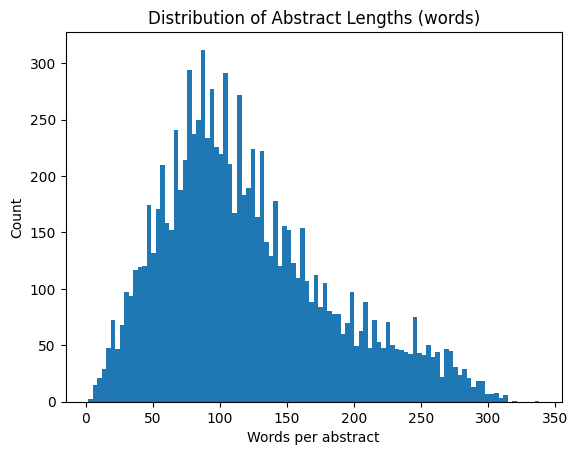

In [28]:
import matplotlib.pyplot as plt

plt.hist(df["abstract_length"], bins=100)
plt.title("Distribution of Abstract Lengths (words)")
plt.xlabel("Words per abstract")
plt.ylabel("Count")
plt.show()


In [29]:
df["num_authors"] = df["authors"].fillna("").str.split(",").apply(len)
df["num_authors"].describe()


count    10000.000000
mean         3.080900
std          4.398032
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: num_authors, dtype: float64

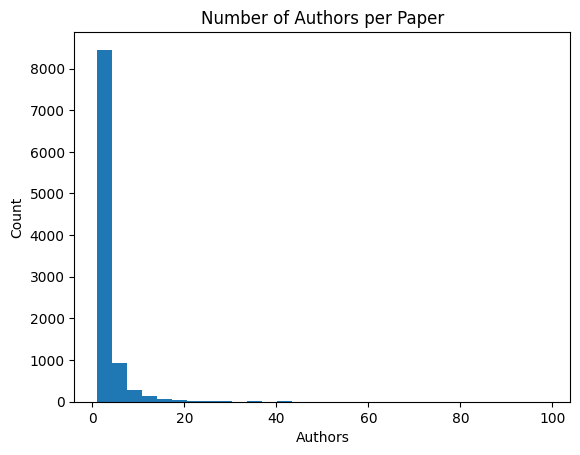

In [30]:
plt.hist(df["num_authors"], bins=30)
plt.title("Number of Authors per Paper")
plt.xlabel("Authors")
plt.ylabel("Count")
plt.show()


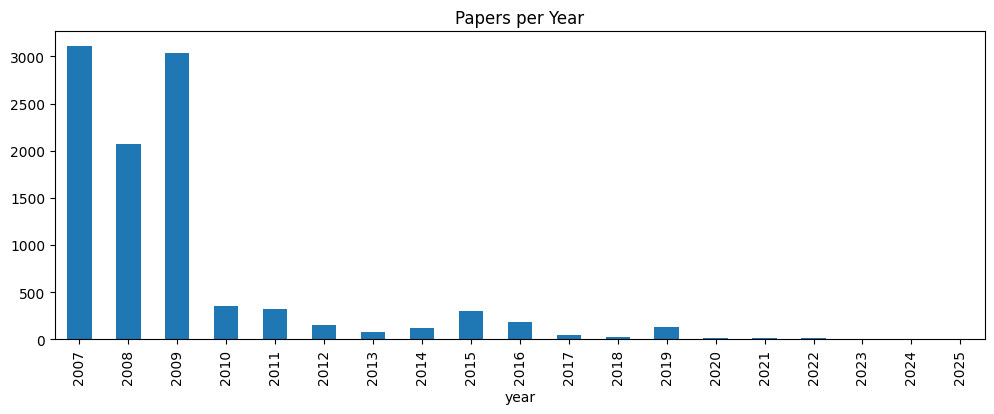

In [31]:
df["year"] = pd.to_datetime(df["update_date"]).dt.year
df["year"].value_counts().sort_index().plot(kind="bar", figsize=(12,4))
plt.title("Papers per Year")
plt.show()


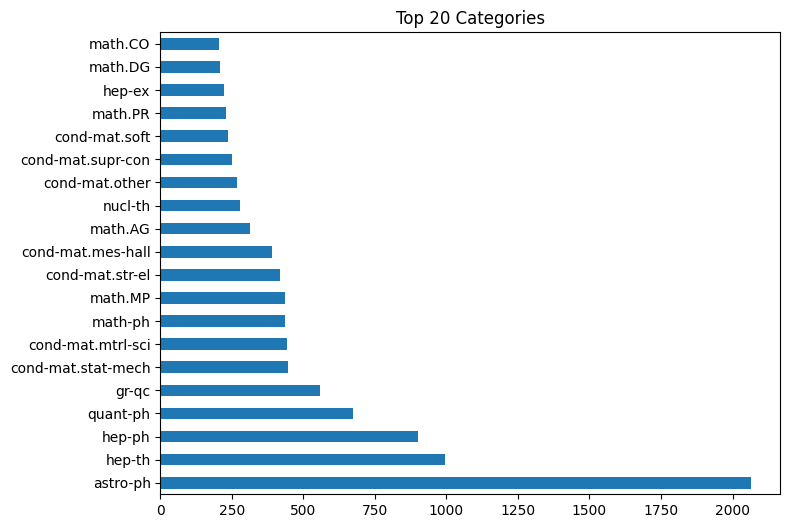

In [32]:
from collections import Counter

def flatten_categories(cats):
    if not cats: return []
    return cats.split() if isinstance(cats, str) else []

cat_counts = Counter()
df["categories"].dropna().apply(lambda x: cat_counts.update(flatten_categories(x)))
pd.Series(cat_counts).nlargest(20).plot(kind="barh", figsize=(8,6))
plt.title("Top 20 Categories")
plt.show()


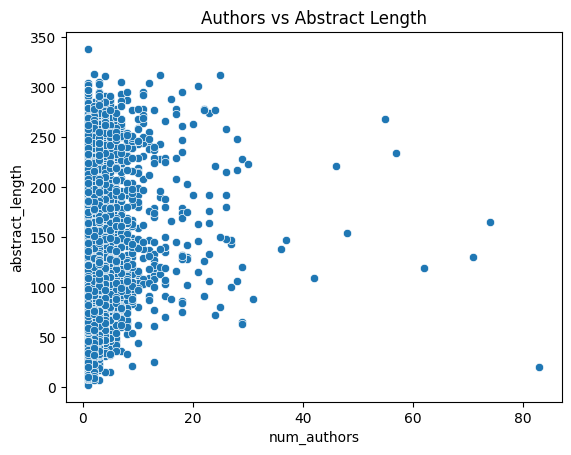

In [33]:
import seaborn as sns

sns.scatterplot(x="num_authors", y="abstract_length", data=df.sample(5000))
plt.title("Authors vs Abstract Length")
plt.show()
